In [2]:
# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

2021-10-02 12:42:26.394603: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-02 12:42:26.394662: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Imported the modules.


In [3]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

train_df = train_df.reindex(np.random.permutation(train_df.index))

feature columns

In [4]:
# Creating an empty list that will eventually hold all feature columns.
feature_columns = []

latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

#convert the list into a layer that will become part of the model.abs

fp_feature_layer = layers.DenseFeatures(feature_columns)



When used, the layer processes the raw inputs, according to the transformations described by the feature columns, and packs the result into a numeric array. (The model will train on this numeric array.)

In [16]:
#here comes the train and buld model methods definition
#And their Plot methods
def create_model(my_learning_rate, feature_layer):
  """Creating and compiling a simple linear regression model."""
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Constructing the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate==my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")


Defined the create_model, train_model, and plot_the_loss_curve functions.


2021-10-02 13:12:57.604351: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-02 13:12:57.604429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harold-finch): /proc/driver/nvidia/version does not exist
2021-10-02 13:12:57.622488: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/arafat/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-10-02 13:12:58.373141: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Opti

Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 14541.8027 - root_mean_squared_error: 120.5894
Epoch 2/30
170/170 [==============================] - 0s 919us/step - loss: 13571.8633 - root_mean_squared_error: 116.4983
Epoch 3/30
170/170 [==============================] - 0s 875us/step - loss: 13522.6445 - root_mean_squared_error: 116.2869
Epoch 4/30
170/170 [==============================] - 0s 826us/step - loss: 13461.4531 - root_mean_squared_error: 116.0235
Epoch 5/30
170/170 [==============================] - 0s 800us/step - loss: 13416.3047 - root_mean_squared_error: 115.8288
Epoch 6/30
170/170 [==============================] - 0s 837us/step - loss: 13379.0693 - root_mean_squared_error: 115.6679
Epoch 7/30
170/170 [==============================] - 0s 841us/step - loss: 13339.1445 - root_mean_squared_error: 115.4952
Epoch 8/30
170/170 [===========

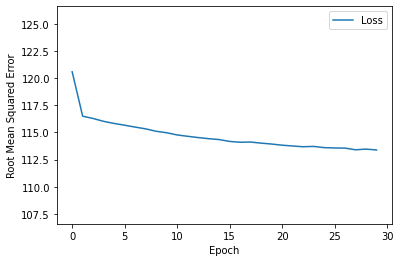


: Evaluating the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 12232.0889 - root_mean_squared_error: 110.5988


[12232.0888671875, 110.5987777709961]

In [9]:
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "median_house_value"

my_model = create_model(learning_rate,fp_feature_layer)

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluating the new model against the test set:")
test_features = {name: np.array(value) for name , value in test_df.items()}

# print(test_features)
test_label = np.array(test_features.pop(label_name))

# print(test_label)
my_model.evaluate(x=test_features,y = test_label, batch_size= batch_size)



# No. Representing latitude and longitude as 
# floating-point values does not have much 
# predictive power. For example, neighborhoods at 
# latitude 35 are not 36/35 more valuable 
# (or 35/36 less valuable) than houses at 
# latitude 36.

# Representing `latitude` and `longitude` as 
# floating-point values provides almost no 
# predictive power. We're only using the raw values 
# to establish a baseline for future experiments 
# with better representations.

In [41]:
#Represent LAtitude and longitude in bins
#10 buckets for lat
#10 buckets for longitude

resolution_in_degrees = 2.5

feature_columns = []

#creating bucket for latitude
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")

latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                            int(max(train_df['latitude'])),
                            resolution_in_degrees))

latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)
feature_columns.append(latitude)

#creating bucket for longitude
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")

longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                            int(max(train_df['longitude'])),
                            resolution_in_degrees))

longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

feature_columns.append(longitude)

buckets_feature_layer = layers.DenseFeatures(feature_columns)



Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 0s 859us/step - loss: 16956.8438 - root_mean_squared_error: 130.2184
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 10824.8496 - root_mean_squared_error: 104.0425
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 10701.3643 - root_mean_squared_error: 103.4474
Epoch 4/35
170/170 [==============================] - 0s 959us/step - loss: 10664.2158 - root_mean_squared_error: 103.2677
Epoch 5/35
170/170 [==============================] - 0s 980us/step - loss: 10654.0557 - root_mean_squared_error: 103.2185
Epoch 6/35
170/170 [==============================] - 0s 974us/step - loss: 10649.5186 - root_mean_squared_error: 103.1965
Epoch 7/35
170/170 [==============================] - 0s 997us/step - loss: 10649.4805 - root_mean_squared_error: 103.1963
Epoch 8/35
170/170 [=============

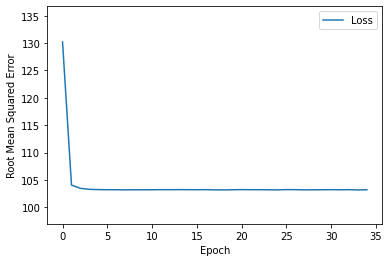


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 801us/step - loss: 10276.1309 - root_mean_squared_error: 101.3713


[10276.130859375, 101.37125396728516]

In [42]:
#train the model with bucketsized features\

learning_rate=0.04
epochs = 35

my_model = create_model(learning_rate,buckets_feature_layer)

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)
print("\n: Evaluate the new model against the test set:")

my_model.evaluate(x= test_features,y = test_label, batch_size= batch_size )



In [43]:
#so binning outperforms float point representation of features

# more imporvement possible using feature cross

feature_columns = []

latitude_x_longitude= tf.feature_column.crossed_column([latitude, longitude],hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

feature_cross_feature_layer = layers.DenseFeatures(feature_columns)




Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 20156.2656 - root_mean_squared_error: 141.9728
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 10581.9463 - root_mean_squared_error: 102.8686
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 10568.1191 - root_mean_squared_error: 102.8013
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 10569.3047 - root_mean_squared_error: 102.8071
Epoch 5/35
170/170 [==============================] - 0s 1ms/step - loss: 10571.6602 - root_mean_squared_error: 102.8186
Epoch 6/35
170/170 [==============================] - 0s 1ms/step - loss: 10564.6475 - root_mean_squared_error: 102.7845
Epoch 7/35
170/170 [==============================] - 0s 1ms/step - loss: 10569.3955 - root_mean_squared_error: 102.8076
Epoch 8/35
170/170 [=======================

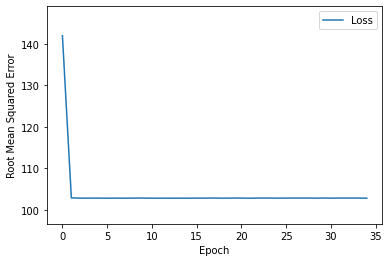


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 887us/step - loss: 10175.8936 - root_mean_squared_error: 100.8756


[10175.8935546875, 100.8756332397461]

In [44]:
learning_rate = 0.04
epochs = 35
# create the model
my_model = create_model(learning_rate, feature_cross_feature_layer)

#Train the model
epochs, rmse = train_model(my_model,train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")

my_model.evaluate(x = test_features, y = test_label, batch_size= batch_size)



In [46]:
#changing resolution_in_degrees and see the difference

